**KMeans Clustering**

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("USArrests.csv")
df.head()

,rownames,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [72]:
df = pd.read_csv("USArrests.csv", index_col =0)
df.head()


,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [74]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [75]:
import os

# Set the environment variable
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
k_means = KMeans(n_clusters =2, random_state=42)

In [4]:
k_means.fit(df)

NameError: name 'df' is not defined

In [79]:
clusters = k_means.labels_

In [80]:
clusters

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

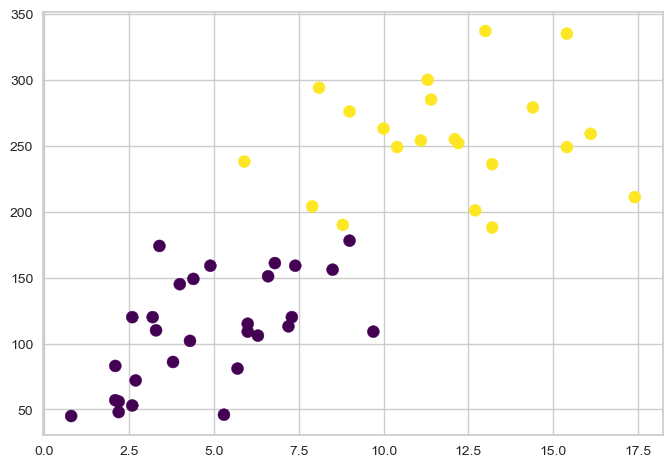

In [81]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c= clusters, s = 75, cmap ="viridis")

In [82]:
centroids = k_means.cluster_centers_

In [83]:
centroids

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571]])

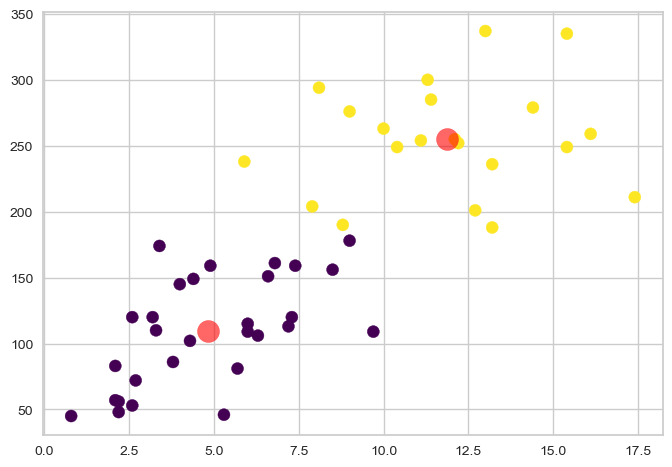

In [84]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c= clusters, s = 75, cmap ="viridis")
plt.scatter(centroids[:,0], centroids[:,1], c ="red", s = 250, alpha =0.6)

In [85]:
rate = []

K = range(2,10)

for i in K:
    kmeans = KMeans(n_clusters =i)
    kmeans.fit(df)
    rate.append(kmeans.inertia_)
    

In [86]:
rate

[96399.02814449916,
 47964.26535714286,
 34728.629357142854,
 24495.167543123545,
 19111.84463492063,
 15714.261305555558,
 13285.616920634917,
 11151.505119047619]

Text(0.5, 1.0, 'Elbow')

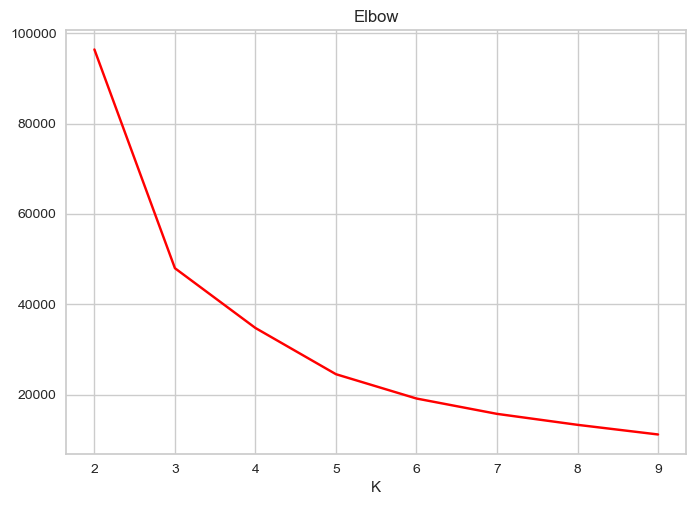

In [87]:
plt.plot(K, rate, "red")
plt.xlabel("K")
plt.title("Elbow")

In [88]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [89]:
from yellowbrick.cluster import KElbowVisualizer

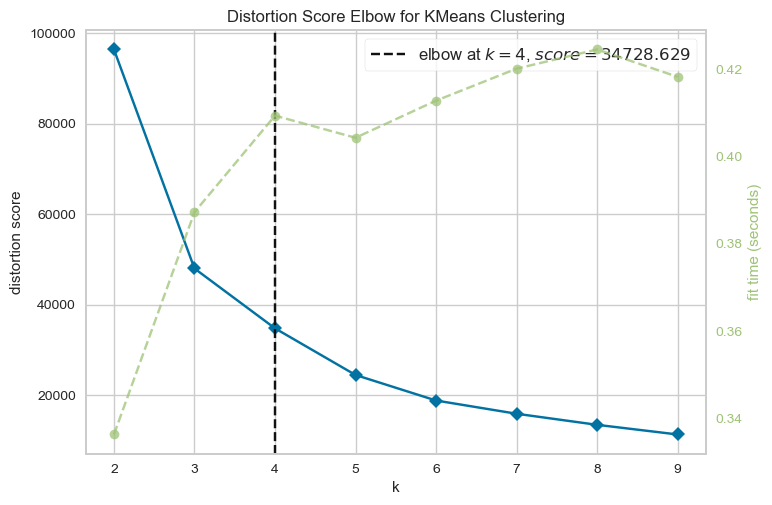

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [91]:
kmeans_yellowbrick = KMeans() # n_init is for suppressing warning
graph = KElbowVisualizer(kmeans_yellowbrick, k =(2,10))
graph.fit(df)
graph.poof()

In [92]:
new_kmeans = KMeans(n_clusters =4, random_state =42)
new_kmeans.fit(df)

KMeans(n_clusters=4, random_state=42)

In [93]:
labels = new_kmeans.labels_

In [94]:
labels

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 0, 3, 1, 3, 0, 3, 3, 1, 0, 1, 2, 1,
       0, 1, 2, 3, 3, 1, 0, 2, 1, 1, 1, 0, 3, 2, 2, 3, 2, 1, 0, 2, 2, 3,
       0, 2, 2, 0, 0, 2])

In [95]:
df["cluster_id"] = labels

In [96]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster_id
rownames,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


In [97]:
sil_score = silhouette_score(df, labels)
print(f"for n=4: {sil_score}")

for n=4: 0.5016267918708461


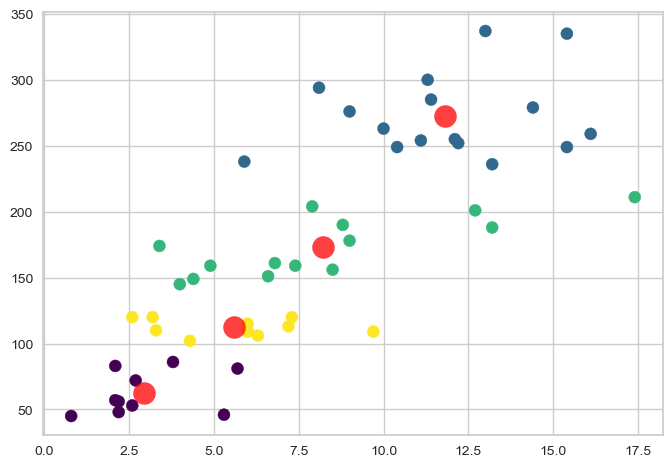

In [98]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c= labels, s = 75, cmap ="viridis")
plt.scatter(new_kmeans.cluster_centers_[:,0], new_kmeans.cluster_centers_[:,1], c ="red", s = 250, alpha =0.75)

In [99]:
from sklearn.metrics.cluster import adjusted_rand_score

In [100]:
new_df = df.sample(15, random_state =42)
new_df

,Murder,Assault,UrbanPop,Rape,cluster_id
rownames,,,,,
Indiana,7.2,113,65,21.0,3
South Carolina,14.4,279,48,22.5,1
New Mexico,11.4,285,70,32.1,1
Virginia,8.5,156,63,20.7,2
Louisiana,15.4,249,66,22.2,1
Wisconsin,2.6,53,66,10.8,0
Nebraska,4.3,102,62,16.5,3
Montana,6.0,109,53,16.4,3
North Carolina,13.0,337,45,16.1,1


In [101]:
new_df["true_label"] = [1,2,3,0,2,2,1,3,2,0,2,1,1,2,3]

In [102]:
new_df

,Murder,Assault,UrbanPop,Rape,cluster_id,true_label
rownames,,,,,,
Indiana,7.2,113,65,21.0,3,1
South Carolina,14.4,279,48,22.5,1,2
New Mexico,11.4,285,70,32.1,1,3
Virginia,8.5,156,63,20.7,2,0
Louisiana,15.4,249,66,22.2,1,2
Wisconsin,2.6,53,66,10.8,0,2
Nebraska,4.3,102,62,16.5,3,1
Montana,6.0,109,53,16.4,3,3
North Carolina,13.0,337,45,16.1,1,2


In [103]:
adjusted_rand_score(new_df["true_label"], new_df["cluster_id"])

0.2153846153846154

**Hierarchical Clustering**

In [104]:
from sklearn.datasets import make_blobs

In [108]:
data = make_blobs(n_samples =300, n_features =2, centers =3, cluster_std =1.3, random_state =42)

In [109]:
data

(array([[ -7.47679636,  -7.98490727],
        [ -7.99816457,  -7.3800318 ],
        [ -1.43988924,   7.42718938],
        [  4.35689327,   3.40157959],
        [ -9.52918909,  -8.1906218 ],
        [  5.75483635,   1.76524959],
        [ -2.28406242,   9.51519872],
        [  5.17668973,   1.24032777],
        [ -3.13212413,   8.77292946],
        [ -4.05789217,   9.86780582],
        [ -3.29141622,  11.42224777],
        [  5.10399897,   1.07238721],
        [ -2.23767495,   6.46671497],
        [ -4.34917959,   8.46744721],
        [ -7.72546253,  -7.51337259],
        [ -3.42186665,   8.58832534],
        [ -8.99543236,  -6.81759916],
        [  2.00719347,   2.21556029],
        [ -2.38299681,  10.27352462],
        [ -1.7462834 ,  11.86187844],
        [ -1.00302337,   7.94739911],
        [ -2.71886905,   9.53955224],
        [  5.90753449,   1.78199509],
        [ -7.02565366,  -7.16737007],
        [ -3.11164062,   8.40883745],
        [ -6.19088176,  -5.00607039],
        [ -7

In [111]:
dots = data[0]
dots

array([[ -7.47679636,  -7.98490727],
       [ -7.99816457,  -7.3800318 ],
       [ -1.43988924,   7.42718938],
       [  4.35689327,   3.40157959],
       [ -9.52918909,  -8.1906218 ],
       [  5.75483635,   1.76524959],
       [ -2.28406242,   9.51519872],
       [  5.17668973,   1.24032777],
       [ -3.13212413,   8.77292946],
       [ -4.05789217,   9.86780582],
       [ -3.29141622,  11.42224777],
       [  5.10399897,   1.07238721],
       [ -2.23767495,   6.46671497],
       [ -4.34917959,   8.46744721],
       [ -7.72546253,  -7.51337259],
       [ -3.42186665,   8.58832534],
       [ -8.99543236,  -6.81759916],
       [  2.00719347,   2.21556029],
       [ -2.38299681,  10.27352462],
       [ -1.7462834 ,  11.86187844],
       [ -1.00302337,   7.94739911],
       [ -2.71886905,   9.53955224],
       [  5.90753449,   1.78199509],
       [ -7.02565366,  -7.16737007],
       [ -3.11164062,   8.40883745],
       [ -6.19088176,  -5.00607039],
       [ -7.62942992,  -5.898101  ],
 

In [112]:
import scipy.cluster.hierarchy as sch

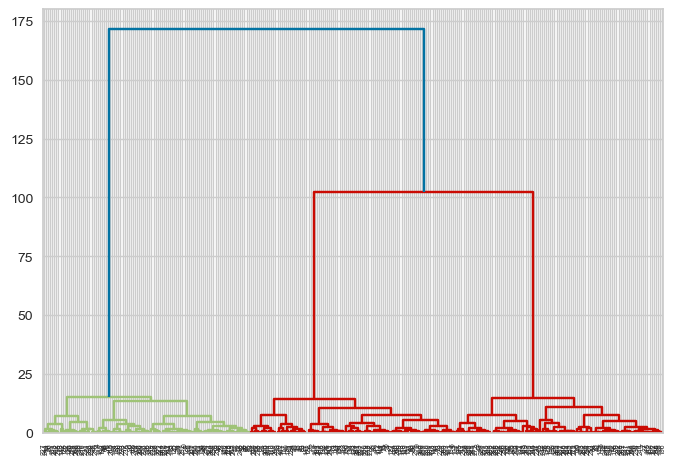

In [114]:
dendrogram = sch.dendrogram(sch.linkage(dots, method ="ward"))

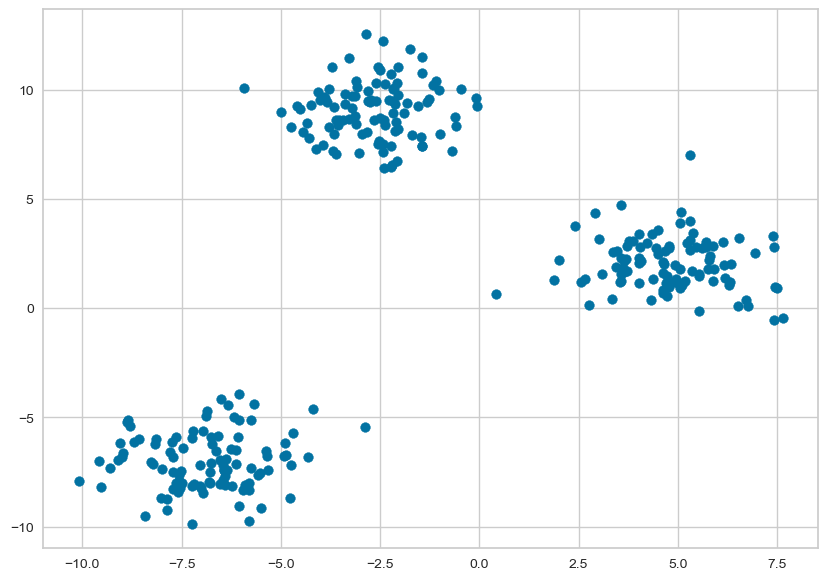

In [117]:
plt.figure(figsize =(10,7))
plt.scatter(dots[:,0], dots[:,1])

In [119]:
from sklearn.cluster import AgglomerativeClustering

In [122]:
hierarchial_clustering = AgglomerativeClustering(n_clusters =5, affinity = "euclidean", linkage = "ward")

In [123]:
y_hier_clus = hierarchial_clustering.fit_predict(dots)

In [124]:
y_hier_clus

array([1, 1, 0, 4, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 4, 0, 0, 0, 0,
       2, 1, 0, 3, 1, 4, 2, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2, 0, 1, 4,
       0, 0, 1, 4, 1, 2, 2, 3, 1, 0, 3, 2, 1, 0, 4, 0, 3, 2, 2, 3, 1, 4,
       4, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 4, 0, 2, 0, 0, 1, 0, 2, 1, 3, 0,
       2, 0, 1, 0, 3, 0, 0, 1, 1, 0, 1, 3, 2, 0, 2, 0, 0, 0, 0, 0, 2, 1,
       2, 0, 0, 0, 0, 2, 1, 4, 1, 4, 2, 2, 0, 3, 1, 1, 3, 0, 1, 1, 0, 0,
       0, 0, 0, 2, 2, 1, 0, 1, 0, 0, 3, 0, 4, 4, 2, 0, 2, 0, 0, 3, 2, 1,
       0, 4, 2, 1, 1, 0, 0, 1, 3, 1, 0, 1, 4, 0, 0, 0, 0, 0, 4, 0, 4, 4,
       2, 0, 2, 2, 1, 0, 1, 2, 2, 1, 2, 0, 4, 4, 1, 1, 4, 1, 4, 4, 2, 2,
       0, 3, 0, 0, 4, 4, 0, 2, 1, 1, 4, 0, 0, 1, 2, 4, 1, 3, 3, 1, 0, 1,
       1, 4, 1, 1, 0, 4, 1, 3, 4, 0, 0, 3, 0, 1, 2, 2, 1, 2, 3, 1, 3, 2,
       2, 0, 3, 4, 2, 2, 1, 2, 1, 4, 1, 2, 2, 1, 4, 0, 1, 0, 0, 0, 1, 0,
       2, 4, 3, 2, 2, 0, 0, 2, 4, 2, 3, 1, 1, 0, 0, 0, 4, 2, 2, 4, 1, 2,
       3, 2, 4, 1, 0, 4, 2, 0, 1, 0, 4, 0, 3, 3], d

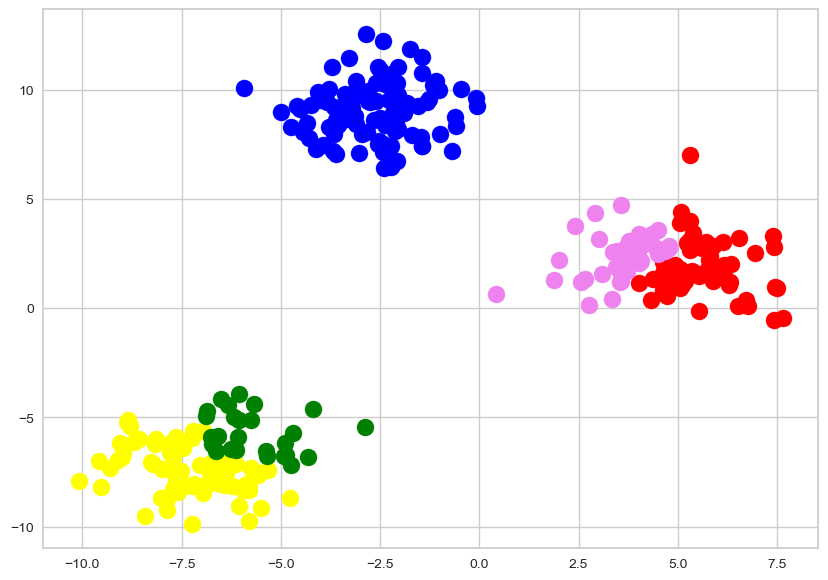

In [128]:
plt.figure(figsize =(10,7))
plt.scatter(dots[y_hier_clus ==0,0],dots[y_hier_clus ==0,1], s= 150, c= "blue")
plt.scatter(dots[y_hier_clus ==1,0],dots[y_hier_clus ==1,1], s= 150, c= "yellow")
plt.scatter(dots[y_hier_clus ==2,0],dots[y_hier_clus ==2,1], s= 150, c= "red")
plt.scatter(dots[y_hier_clus ==3,0],dots[y_hier_clus ==3,1], s= 150, c= "green")
plt.scatter(dots[y_hier_clus ==4,0],dots[y_hier_clus ==4,1], s= 150, c= "violet")

plt.show()